# LERM sensitivity analysis

Here we show the results of varying the `m` and `tau` parameters used when applying the LERM technique. The computations themselves were done on [CARC](https://www.carc.usc.edu/) machines. See [James et al. 2024](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2023PA004700) for details on the method.

In [5]:
import pickle
import os

import numpy as np
import pyleoclim as pyleo
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

In [6]:
with open('..//data/palette_dict.pkl','rb') as handle:
    palette_dict = pickle.load(handle)

with open('..//data/preprocessed_series_dict.pkl','rb') as handle:
    preprocessed_series_dict = pickle.load(handle)

# Sort by latitude

lat_dict = {series.lat:series.label for series in preprocessed_series_dict.values()}

sort_index = np.sort(np.array(list(lat_dict.keys())))[::-1]
sort_label = [lat_dict[lat] for lat in sort_index]
preprocessed_series_dict = {label:preprocessed_series_dict[label] for label in sort_label} #Sort by latitude

keys = list(preprocessed_series_dict.keys())

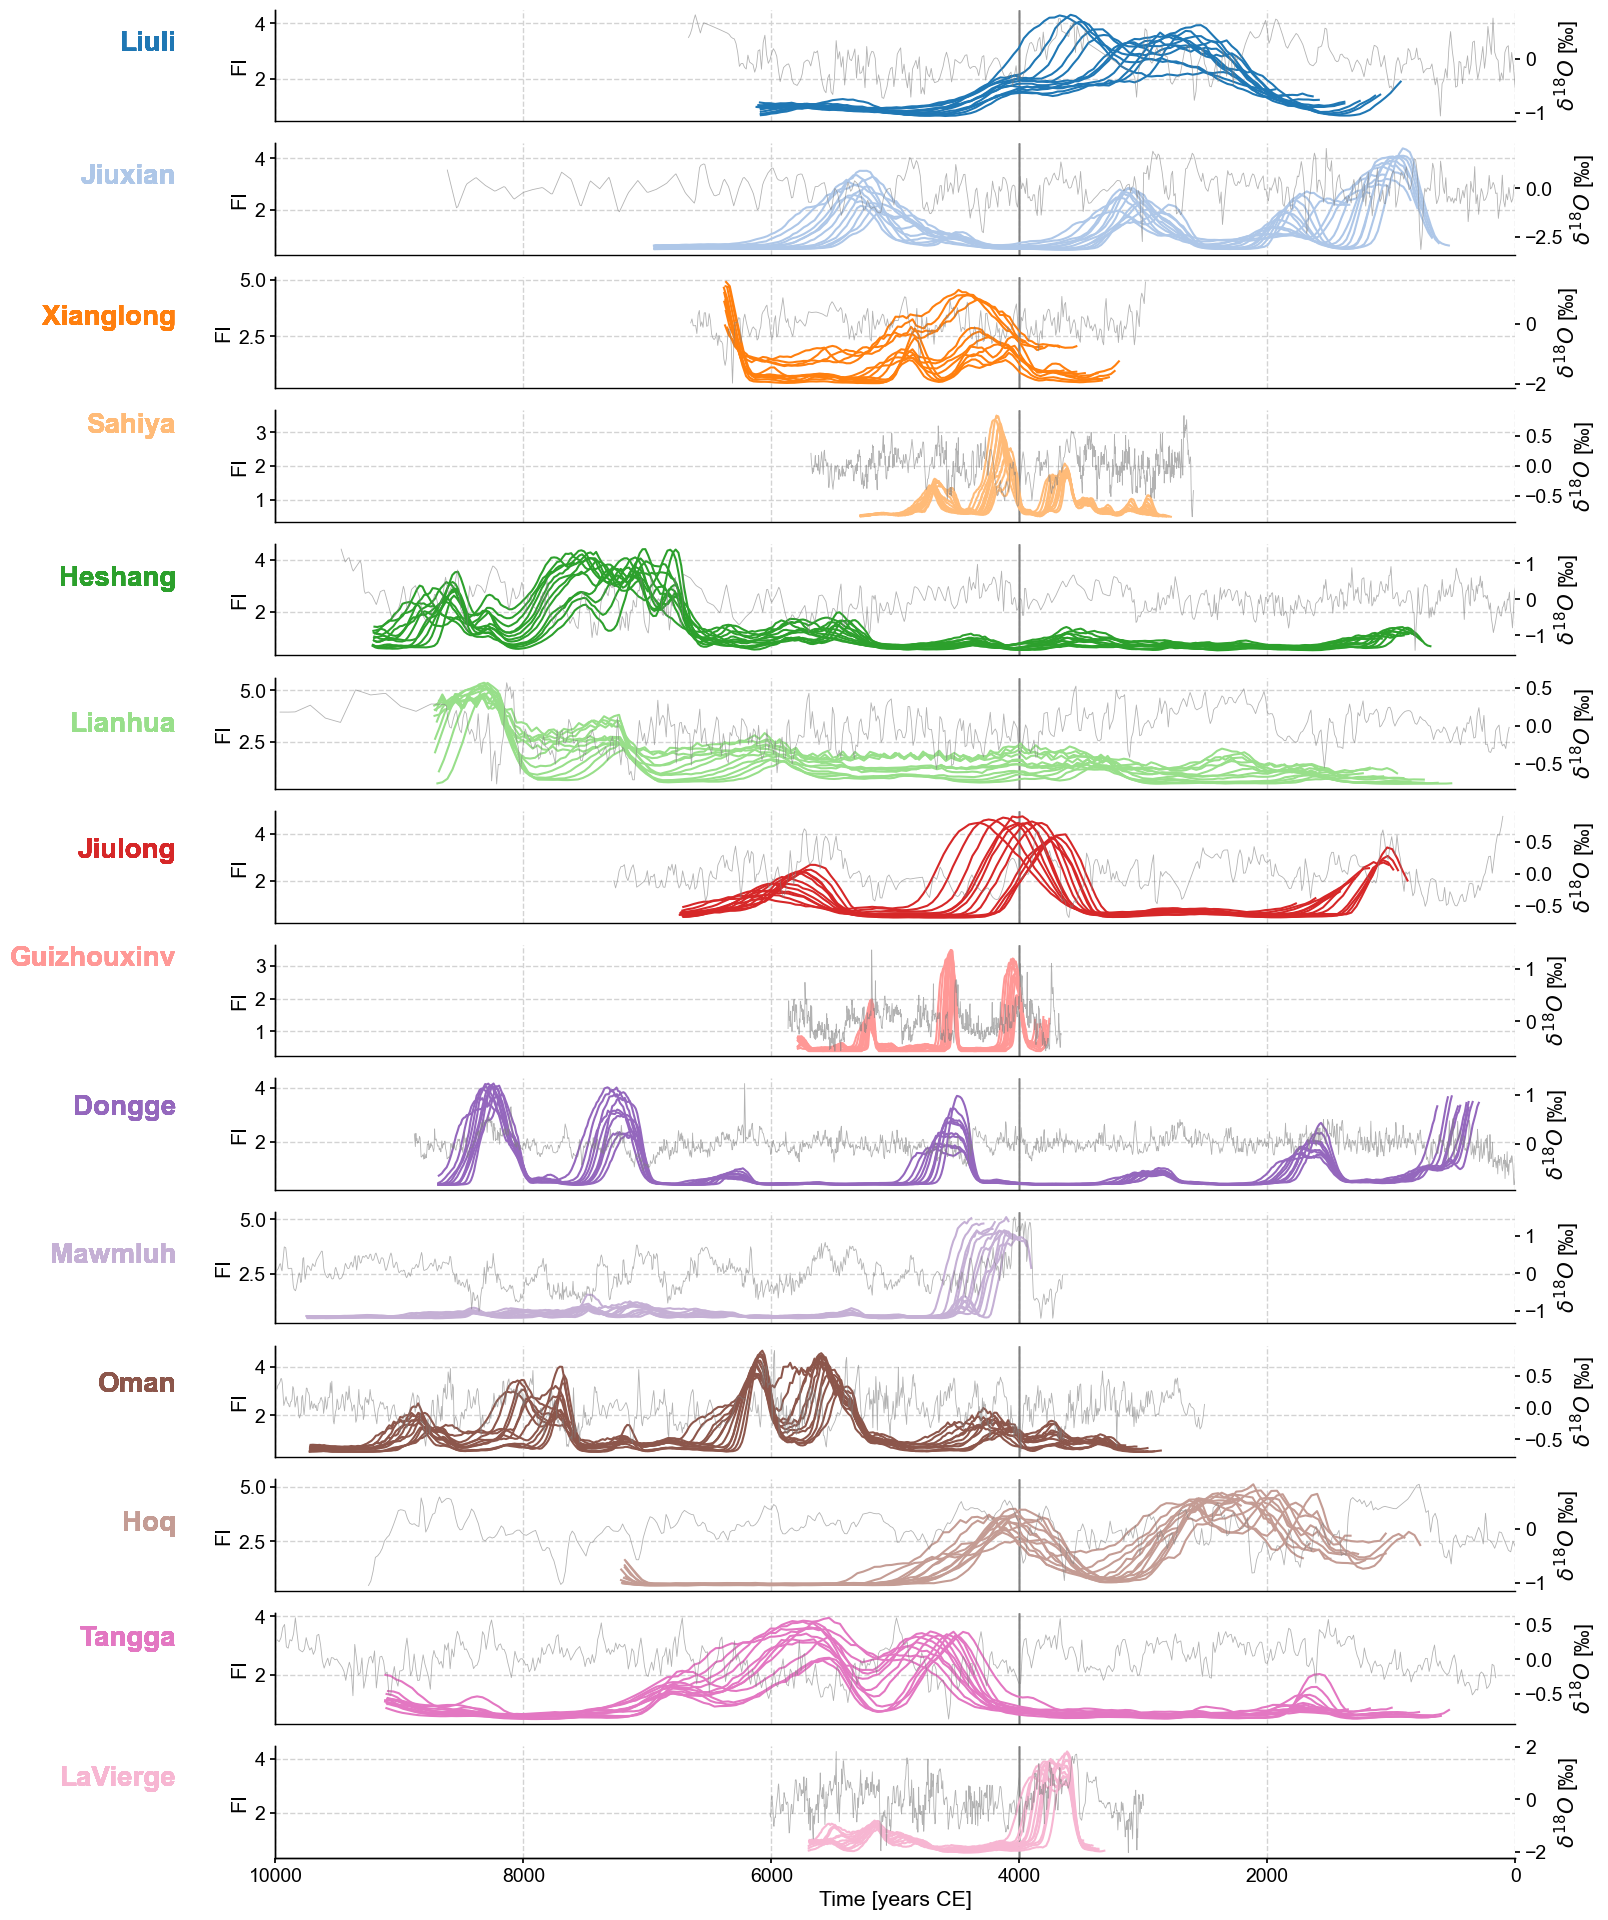

In [7]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=len(keys), ncols=1, sharex=True, figsize=(16, 24))

# Flatten the axes array
axes = axs.ravel()

# Iterate over each pair in file_dict
for idx, label in enumerate(keys):
    color = palette_dict[label]
    series = preprocessed_series_dict[label]
    ax = axes[idx]

    with open(f'../data/lerm/{label}.pkl', 'rb') as handle:
        ens_dict = pickle.load(handle)
    
    # Iterate over each file in the file list
    for idy, ens in enumerate(ens_dict.values()):

        # Get the median of the ensemble
        median = ens.common_time().quantiles().series_list[1]
        
        # Plot the median of the ensemble
        median.plot(ax=ax, linewidth=1.5, color=color)
        
        # Create a twin y-axis and plot the series on it for the 5th file
        if idy == 4:
            twin_ax = ax.twinx()
            series.plot(ax=twin_ax, color='grey', alpha=.6, linewidth=.6, label=None)
            twin_ax.grid(False)
            twin_ax.legend().set_visible(False)
        
        # Add a label to the plot
        trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
        ax.text(x=-.08, y=3, s=f'{label}', horizontalalignment='right', transform=trans, color=color, weight='bold', fontsize=20)
        
        # Set y-label and hide the legend
        ax.set_ylabel('FI')
        ax.legend().set_visible(False)
        
        # Set x-axis limits
        ax.set_xlim([10000, 0])
        
        # Remove x-label and hide bottom spine and ticks for all subplots except the last one
        if idx != len(keys) - 1:
            ax.set_xlabel(None)
            ax.spines[['bottom']].set_visible(False)
            ax.tick_params(bottom=False)
        
        # Add a vertical span to highlight a specific time interval
        ax.axvspan(xmin=4000, xmax=4000, color='grey', alpha=.3)